In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

In [2]:
nodos = range(1,100)
tiempos = [random.normalvariate(n**2,50) for n in nodos]
complejidad = [1500 + (n**2) for n in nodos]

df = pd.DataFrame({'Nodos': nodos, 'Tiempo (milisegundos)': tiempos, 'Complejidad n^n': complejidad})

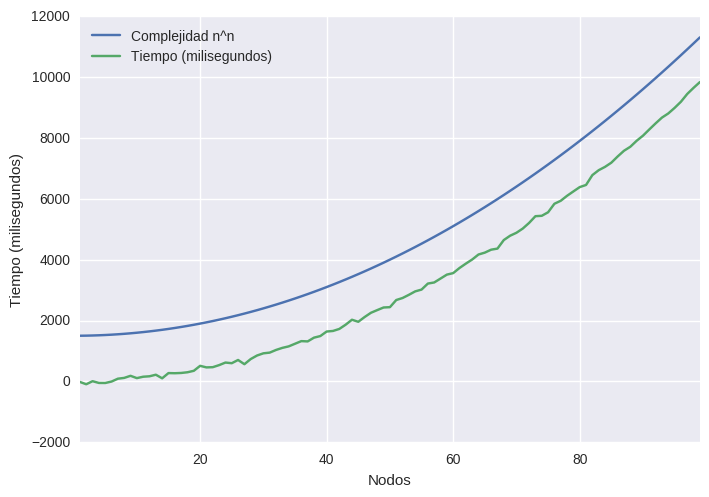

In [3]:
plt.clf()
df.plot(x='Nodos')
plt.ylabel('Tiempo (milisegundos)')
plt.show()

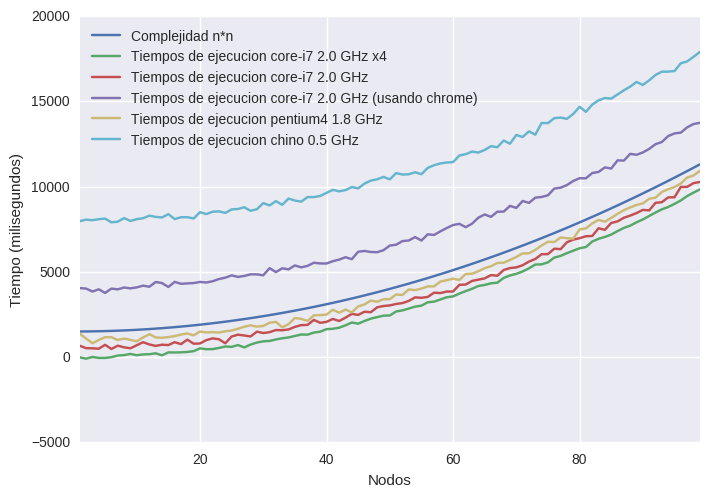

In [4]:
df2 = pd.DataFrame()

tiempos1 = map(lambda x: random.normalvariate(500,100) + random.normalvariate(x**2,50), nodos)
tiempos2 = map(lambda x: random.normalvariate(1000,100) + random.normalvariate(x**2,50), nodos)
tiempos3 = map(lambda x: random.normalvariate(4000,100) + random.normalvariate(x**2,50), nodos)
tiempos4 = map(lambda x: random.normalvariate(8000,100) + random.normalvariate(x**2,50), nodos)

df2['Nodos'] = nodos
df2['Complejidad n*n'] = complejidad
df2['Tiempos de ejecucion core-i7 2.0 GHz x4'] = tiempos
df2['Tiempos de ejecucion core-i7 2.0 GHz'] = tiempos1
df2['Tiempos de ejecucion core-i7 2.0 GHz (usando chrome)'] = tiempos3
df2['Tiempos de ejecucion pentium4 1.8 GHz'] = tiempos2
df2['Tiempos de ejecucion chino 0.5 GHz'] = tiempos4

plt.clf()
df2.plot(x='Nodos')
plt.ylabel('Tiempo (milisegundos)')
plt.show()

## ¿Como hago entonces para comparar peras con manzanas si es lo que necesito?
En algunos casos donde conocemos uno de los datos y necesitamos estudiar otro, si sabemos que existe una correlación entre dos o más variables, lo que podemos hacer es mirar la correlación entre los datos. Es importante destacar que la valides de los resultados depende fuertemente del conocimiento previo entre la relación de las variables, dicho de otro modo, que la correlación existente tenga una explicación de causalidad y no de casualidad.

Algunos ejemplos:
- La cantidad de muertos por ahogo está fuertemente correlacionada con la venta de helado. No hay causalidad pero tampoco casualidad, lo que sucede es que ambas variables estan correlacionadas con el calor y cuanto mas calor mas se mete al mar la gente y más elado comprar, hay una causalidad comun.
- La cantidad de manzanas producidas por un manzano esta fuertemente correlacionada con la cantidad de peras producidas por un peral. Por el mismo motivo que en el ejemplo anterior, ambas plantas dan frutas en el mismo momento del año.
- El tiempo de corrida de un programa esta fuertemente correlacionado con la complejidad del algoritmo.

In [14]:
df3 = pd.DataFrame()

df3['Nodos'] = nodos
df3['Tiempos'] = tiempos
df3['Complejidad n^2'] = [n**2 for n in nodos]
df3['Complejidad n^3'] = [n**3 for n in nodos]
df3['Complejidad n^8'] = [n**8 for n in nodos]

In [15]:
plt.clf()
correlation = df3.corr()
correlation

,Nodos,Tiempos,Complejidad n^2,Complejidad n^3,Complejidad n^8
Nodos,1.000000,0.969189,0.968861,0.917563,0.715678
Tiempos,0.969189,1.000000,0.999871,0.985756,0.838339
Complejidad n^2,0.968861,0.999871,1.000000,0.986088,0.838569
Complejidad n^3,0.917563,0.985756,0.986088,1.000000,0.909256
Complejidad n^8,0.715678,0.838339,0.838569,0.909256,1.000000


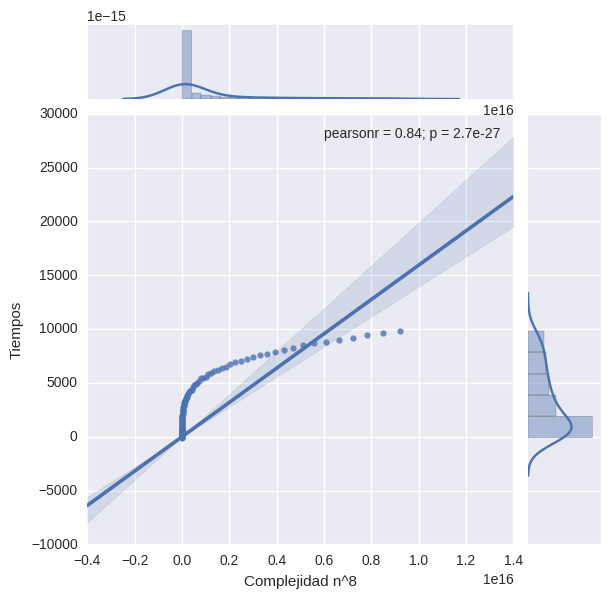

In [17]:
sns.jointplot(df3['Complejidad n^8'], df3['Tiempos'], kind="reg")
sns.plt.show()

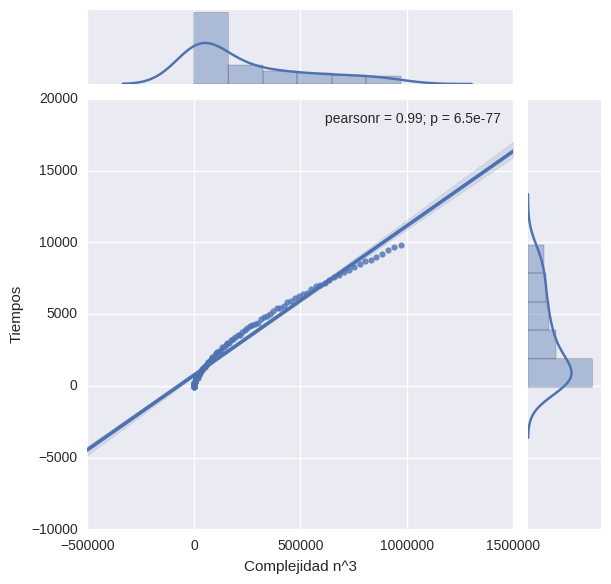

In [18]:
sns.jointplot(df3['Complejidad n^3'], df3['Tiempos'], kind="reg")
sns.plt.show()

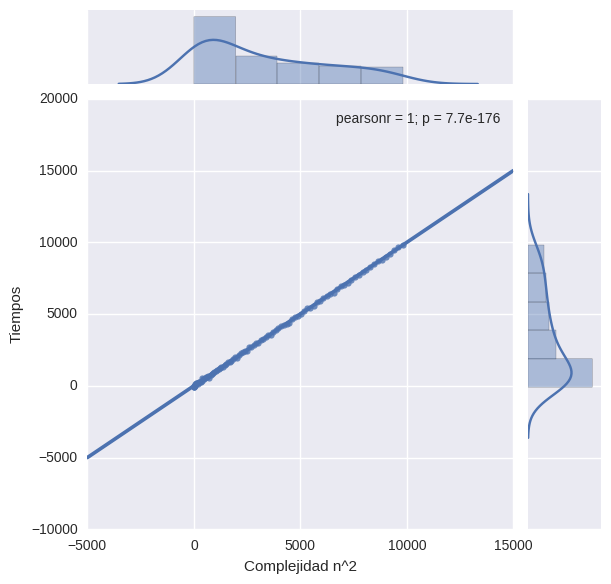

In [19]:
sns.jointplot(df3['Complejidad n^2'], df3['Tiempos'], kind="reg")
sns.plt.show()